In [2]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import ast
import seaborn as sns
from adjustText import adjust_text

dataset = load_dataset('Jamiefor3/Worldwide_Layoffs_Data')
df = dataset['train'].to_pandas()

df['date'] = pd.to_datetime(df['date'])

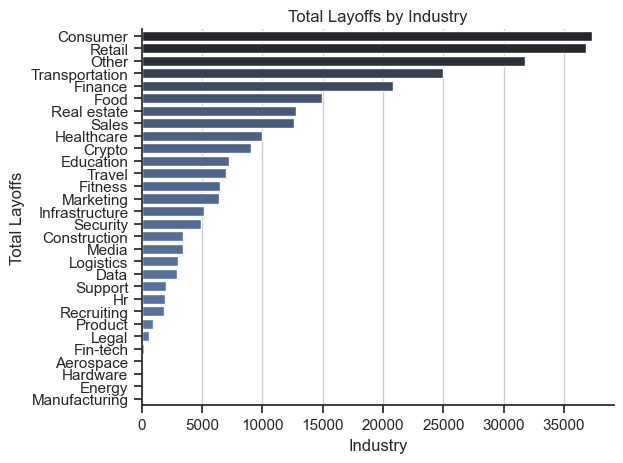

In [15]:
industry_layoffs = df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).reset_index().copy()

sns.set_theme(style='ticks')
sns.barplot(data=industry_layoffs, y='industry', x='total_laid_off', hue='total_laid_off', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Total Layoffs by Industry')
plt.xlabel('Industry')
plt.ylabel('Total Layoffs')
plt.tight_layout()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

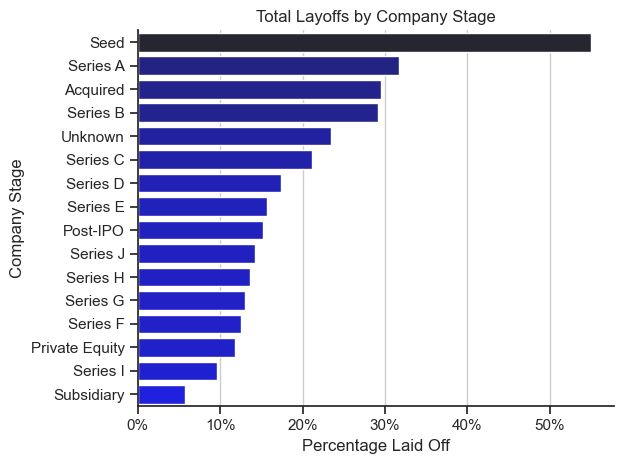

In [16]:
stage_layoffs = df.groupby('stage')['percentage_laid_off'].mean().sort_values(ascending=False).reset_index().copy()
stage_layoffs['percentage_laid_off'] = stage_layoffs['percentage_laid_off'] * 100
# Create a bar plot to visualize the total layoffs by company stage
sns.barplot(y='stage', x='percentage_laid_off', data=stage_layoffs, hue ='percentage_laid_off', palette='dark:blue_r', legend=False)

# Customize the plot
sns.despine()
plt.title('Total Layoffs by Company Stage')
plt.xlabel('Percentage Laid Off')
plt.ylabel('Company Stage')
plt.grid(True, axis='x')
ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()

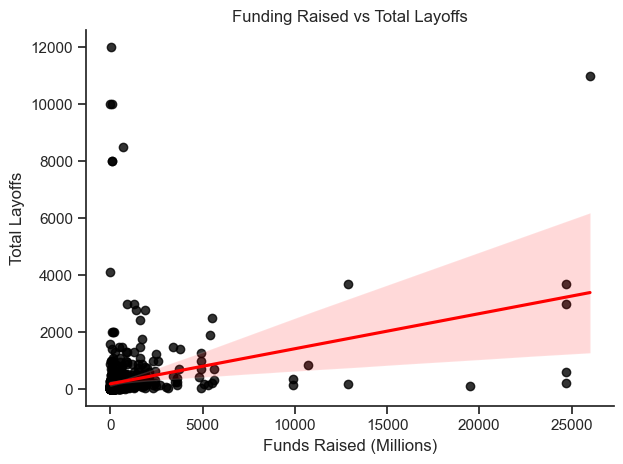

In [17]:
funds_no_outliers = df[df['funds_raised_millions'] <=120000].copy()
sns.regplot(x='funds_raised_millions', y='total_laid_off', data=funds_no_outliers, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
sns.despine()
plt.title('Funding Raised vs Total Layoffs')
plt.xlabel('Funds Raised (Millions)')
plt.ylabel('Total Layoffs')
plt.tight_layout()
plt.show()

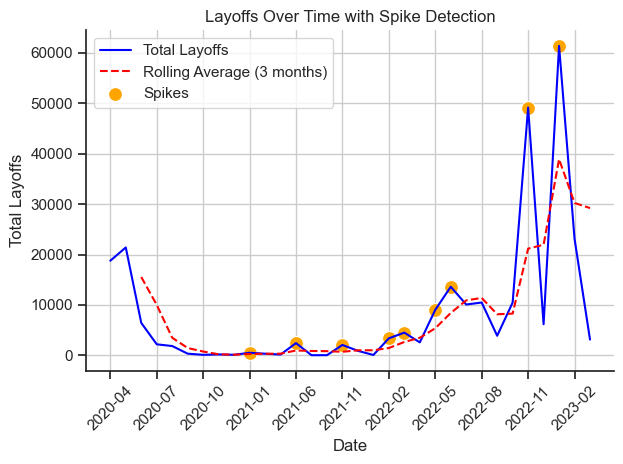

In [ ]:
df_month = df.groupby(df['date'].dt.to_period('M'))['total_laid_off'].sum().reset_index().copy()

df_month['rolling_avg'] = df_month['total_laid_off'].rolling(window=3).mean()


sns.lineplot(x=df_month['date'].astype(str), y=df_month['total_laid_off'], label='Total Layoffs', color='blue')
sns.lineplot(x=df_month['date'].astype(str), y=df_month['rolling_avg'], label='Rolling Average (3 months)', color='red', linestyle='--')


spikes = df_month[df_month['total_laid_off'] > df_month['rolling_avg'] * 1.5]
sns.scatterplot(x=spikes['date'].astype(str), y=spikes['total_laid_off'], color='orange', label='Spikes', s=100)


sns.despine()
plt.title('Layoffs Over Time with Spike Detection')
plt.xlabel('Date')
plt.ylabel('Total Layoffs')
ticks = df_month.index[::3]
tick_labels = df_month['date'].iloc[::3]
plt.xticks(ticks, tick_labels, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
start_date = '2022-10-31'
end_date = '2023-02-01'

spike_dates_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
spike_dates_df.sort_values(by='total_laid_off', ascending=False).head(15)


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
108,Google,SF Bay Area,Consumer,12000,0.06,2023-01-20,Post-IPO,United States,26
299,Meta,SF Bay Area,Consumer,11000,0.13,2022-11-09,Post-IPO,United States,26000
270,Amazon,Seattle,Retail,10000,0.03,2022-11-16,Post-IPO,United States,108
117,Microsoft,Seattle,Other,10000,0.05,2023-01-18,Post-IPO,United States,1
172,Amazon,Seattle,Retail,8000,0.02,2023-01-04,Post-IPO,United States,108
173,Salesforce,SF Bay Area,Sales,8000,0.10,2023-01-04,Post-IPO,United States,65
271,Cisco,SF Bay Area,Infrastructure,4100,0.05,2022-11-16,Post-IPO,United States,2
314,Twitter,SF Bay Area,Consumer,3700,0.50,2022-11-04,Post-IPO,United States,12900
92,Sap,Walldorf,Other,3000,0.03,2023-01-26,Post-IPO,Germany,1300
75,Paypal,SF Bay Area,Finance,2000,0.07,2023-01-31,Post-IPO,United States,216


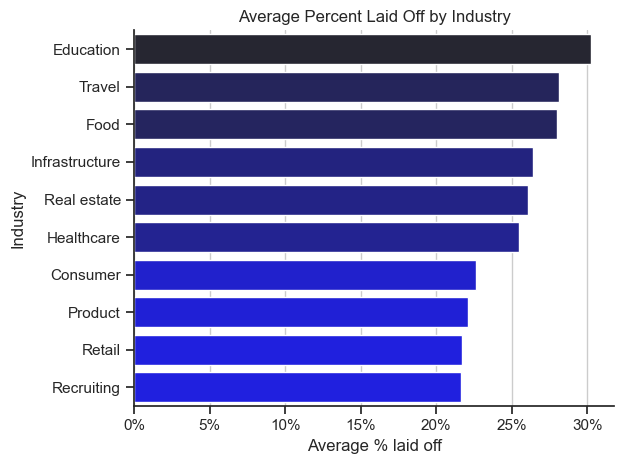

In [40]:
industry_counts = df['industry'].value_counts().copy()
filtered_industry = industry_counts[industry_counts >= 10].index
df_filtered_industry = df[df['industry'].isin(filtered_industry)]
industry_perc_plot = df_filtered_industry.groupby('industry')['percentage_laid_off'].mean().sort_values(ascending=False).head(10).reset_index()
industry_perc_plot['percentage_laid_off'] = industry_perc_plot['percentage_laid_off'] * 100
sns.barplot(data=industry_perc_plot, x='percentage_laid_off', y='industry', hue='percentage_laid_off', palette='dark:blue_r', legend=False)
sns.despine()
plt.title('Average Percent Laid Off by Industry')
plt.ylabel('Industry')
plt.xlabel('Average % laid off')
plt.grid(True, axis='x')
ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()


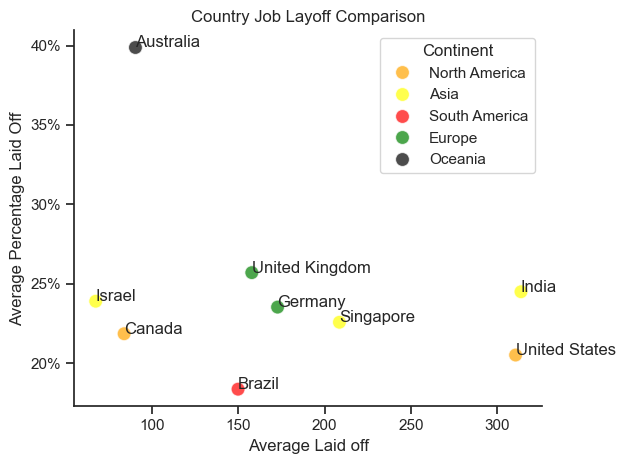

In [29]:
country_counts = df['country'].value_counts().copy()

country_totals = df.groupby('country').agg({
    'total_laid_off': 'mean',
    'percentage_laid_off': 'mean'
})

country_totals['country_count'] = country_totals.index.map(country_counts)
country_totals = country_totals.sort_values(by='country_count', ascending=False).head(9)

continent_mapping = {
    'Australia': 'Oceania',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'India': 'Asia',
    'Brazil': 'South America',
    'Israel': 'Asia',
    'Canada': 'North America',
    'Germany': 'Europe',
    'Singapore': 'Asia'
}

continent_colors = {
    'Europe': 'green',
    'North America': 'orange',
    'South America': 'red',
    'Asia': 'yellow',
    'Oceania': 'black'
}

country_totals['Continent'] = country_totals.index.map(continent_mapping)
country_totals['percentage_laid_off'] = country_totals['percentage_laid_off'] * 100

sns.scatterplot(data=country_totals, x='total_laid_off', y='percentage_laid_off', s= 100, hue='Continent', palette=continent_colors, alpha= 0.7 )
for i, txt in enumerate(country_totals.index):
    plt.annotate(txt, 
                 (country_totals['total_laid_off'].iloc[i], 
                  country_totals['percentage_laid_off'].iloc[i]))

sns.despine()
plt.title('Country Job Layoff Comparison')
plt.xlabel('Average Laid off')
plt.ylabel('Average Percentage Laid Off')
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()
